In [1]:
import sys
sys.path.append("..")  # to make utils importable

In [2]:
import utils.consts
import utils.data_worker

from text_metrics import words_count, tech_words_count, negative_answers_count

Описание полей: <br>
OwnerUserId поста это Id юзера <br>
PostTypeId 1 или 2 - 1 это вопрос, 2 это ответ <br>
ParentId ответа это Id вопроса


In [3]:
posts = utils.data_worker.load_dataset(
    utils.consts.POSTS_DATA_PATH, debug_slice=False)
users = utils.data_worker.load_dataset(
    utils.consts.USERS_DATA_PATH, debug_slice=False)

INFO: Loading dataset ../data/Posts.xml...
INFO: Loading dataset ../data/Users.xml...


In [4]:
questions, answers = utils.data_worker.question_answer_split(posts)

answers.Tags.isna().sum(), answers.shape[0]  # тэги это прерогатива вопросов

(178628, 178628)

In [5]:
posts.sample(5)

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Tags,AnswerCount,CommentCount,ClosedDate,CommunityOwnedDate,ContentLicense,ParentId,OwnerDisplayName,LastEditorDisplayName,FavoriteCount
18235,43930,2,NaN,2011-02-04T22:49:48.310,2,NaN,<p>I like a lot of your third paragraph @Micha...,11940.0,NaN,None,...,None,NaN,0,None,None,CC BY-SA 2.5,43838.0,None,None,NaN
202391,378914,1,378918.0,2018-09-24T15:28:20.923,11,3721.0,<p>I really love clean code and I always want ...,316014.0,316014.0,2018-09-24T16:00:42.220,...,|single-responsibility|encapsulation|separatio...,7.0,3,None,None,CC BY-SA 4.0,NaN,None,None,NaN
175835,338148,2,NaN,2016-12-14T16:48:04.547,6,NaN,"<p>In MVP, the Presenter replaces MVC's Contro...",13181.0,NaN,None,...,None,NaN,0,None,None,CC BY-SA 3.0,338143.0,None,None,NaN
231515,431177,1,NaN,2021-08-19T04:12:58.557,0,635.0,<p>I am using AWS dynamodb for my project.</p>...,15257.0,NaN,None,...,|nosql|aws|,1.0,0,None,None,CC BY-SA 4.0,NaN,None,None,NaN
159334,310526,2,NaN,2016-02-19T12:19:13.477,4,NaN,<p>The product owner is always the proxy to th...,6586.0,6586.0,2016-02-23T14:53:40.800,...,None,NaN,0,None,None,CC BY-SA 3.0,238481.0,None,None,NaN


In [6]:
users.sample(5)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId
29488,42548,388,2011-12-08T17:43:53.963,Alex Garcia,2019-06-27T18:28:20.340,http://www.perdu.com,"Brussels, Belgique","<p>Yup, that's me.</p>\n\n<p>Software enthusia...",12,4,1,222732.0
15981,26284,101,2011-05-26T13:12:31.130,Paolo Stefan,2021-02-22T09:59:33.330,http://paolostefan.it,"Padua, Italy","<p>I love coding, be it for fun or for work.</...",5,6,0,370987.0
204777,257251,101,2016-12-19T05:08:58.897,Pedro,2022-03-18T22:56:13.797,None,None,<h1>SOreadytohelp</h1>\n,0,2,0,274712.0
345479,398260,1,2021-07-24T13:50:32.697,David,2022-06-23T18:38:02.793,https://david-cenzual.github.io/,"Barcelona, Spain",<p>I must not fear. Fear is the mind-killer. F...,0,0,0,21398118.0
277778,339371,1,2019-06-23T17:54:01.363,linly,2020-04-04T16:35:00.330,None,None,None,0,0,0,6770260.0


In [7]:
posts.dropna(subset=["Body"], inplace=True, axis=0)
posts["Body"] = posts["Body"].apply(utils.data_worker.html_to_str)

/Users/bentodan/hse_sna_p2024/complexity_hunters/../utils/data_worker.py:33: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = bs4.BeautifulSoup(html_row, "html.parser")


In [8]:
posts.Body

0         A coworker of mine believes that  any  use of ...
1         Ideally, code should be so well coded that it ...
2         When starting a project for a company that's n...
3         I think the answer is the usual "It depends" o...
4         Sometimes, the things I have to do for my job ...
                                ...                        
244061    I have a NextJS app for which I want to cache ...
244062    The solution is to do the rendering on the ser...
244063    I have a "Games" API which retrieves video gam...
244064    The idea is to have multiple generic endpoints...
244065    Your assumption that you always need all the d...
Name: Body, Length: 243622, dtype: object

In [9]:
assert answers.AcceptedAnswerId.isna().sum() == answers.shape[0]
print(
    f"number of samples for questions {questions.shape[0]}, answers {answers.shape[0]}")

number of samples for questions 63423, answers 178628


In [10]:
answers = answers.dropna(subset=["ParentId", "OwnerUserId", "Score"])
answers.shape[0]

171806

In [11]:
questions["words_cnt"] = words_count(questions["Body"])
questions["tech_words_cnt"] = tech_words_count(questions["Body"])
questions["negative_answers"] = negative_answers_count(questions, answers, 0)

/var/folders/bz/m50lp4pd7gz1pfrr0m8krgtm0000gn/T/ipykernel_28753/12509712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions["words_cnt"] = words_count(questions["Body"])
/var/folders/bz/m50lp4pd7gz1pfrr0m8krgtm0000gn/T/ipykernel_28753/12509712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions["tech_words_cnt"] = tech_words_count(questions["Body"])
/var/folders/bz/m50lp4pd7gz1pfrr0m8krgtm0000gn/T/ipykernel_28753/12509712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [12]:
questions.negative_answers.value_counts()

negative_answers
0     59084
1      3660
2       506
3        99
4        40
5        13
6        12
7         5
13        1
8         1
9         1
17        1
Name: count, dtype: int64

<Axes: >

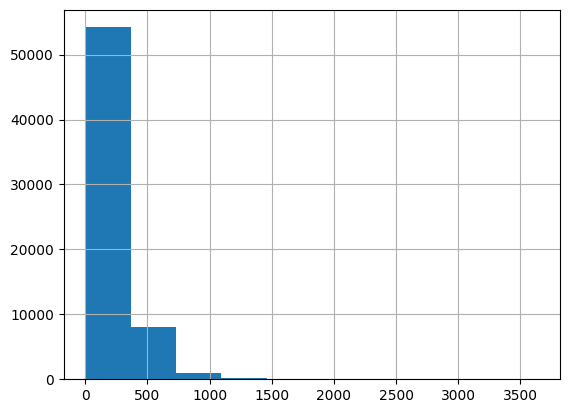

In [13]:
questions.words_cnt.hist()

<Axes: >

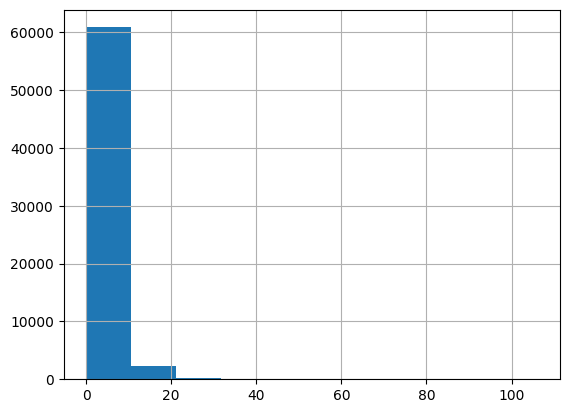

In [14]:
questions.tech_words_cnt.hist()

Добавим флаги по посчитанным метрикам

In [15]:
rating_barrier = -1
len_barrier = 50
tech_words_barrier = 3
questions["is_dummy"] = (questions["Score"] <= rating_barrier) | (
    questions["words_cnt"] <= len_barrier) | (questions["tech_words_cnt"] <= tech_words_barrier)

/var/folders/bz/m50lp4pd7gz1pfrr0m8krgtm0000gn/T/ipykernel_28753/289301930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions["is_dummy"] = (questions["Score"] <= rating_barrier) | (


In [16]:
# len_barrier = 350
questions["is_complex"] = (questions["Score"] > rating_barrier) & (questions["words_cnt"] > len_barrier) & (
    questions["tech_words_cnt"] > tech_words_barrier)  # & (questions["negative_answers"] >= 2)

/var/folders/bz/m50lp4pd7gz1pfrr0m8krgtm0000gn/T/ipykernel_28753/335277192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions["is_complex"] = (questions["Score"] > rating_barrier) & (questions["words_cnt"] > len_barrier) & (


In [17]:
questions.is_dummy.value_counts()

is_dummy
True     49094
False    14329
Name: count, dtype: int64

In [18]:
questions.is_complex.value_counts()

is_complex
False    49094
True     14329
Name: count, dtype: int64

Если учесть наличие `negative_answers`, то количество `complex` вопросов падает до 70 =[

In [19]:
questions[questions["is_dummy"] & questions["is_complex"]
          ].shape[0]  # чекаем, что нет пересечения

0

In [20]:
questions.to_csv("../data/cache/prepared_questions_metrics.csv", index=False)

In [21]:
answers.to_csv("../data/cache/prepared_answers_metrics.csv", index=False)